# Predicting the winner of a Hive game using Classfication

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. Data pre-processing function

In [2]:
pieces_dict = {
    #white pieces
    'wQ': 1,
    'wA1': 2, 'wA2': 2, 'wA3': 2, 
    'wG1': 3, 'wG2': 3, 'wG3': 3,
    'wB1': 4, 'wB2': 4, 
    'wS1': 5, 'wS2': 5,
    'wM': 6,
    'wL': 7,
    'wP': 8,
    #black pieces
    'bQ': -1,
    'bA1': -2, 'bA2': -2, 'bA3': -2,
    'bG1': -3, 'bG2': -3, 'bG3': -3,
    'bB1': -4, 'bB2': -4,
    'bS1': -5, 'bS2': -5,
    'bM': -6,
    'bL': -7,
    'bP': -8
}

color_player_dict = {
    'White': 1,
    'Black': -1
}

def df_preprocessing(df):

    # Replace all NaN values with 0
    df.fillna(0, inplace=True)

    # Use a MinMaxScaler to scale number_of_turn 
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    df['number_of_turn'] = scaler.fit_transform(df[['number_of_turn']])

    # Encoding the neighbor cols
    cols = list(df.columns)
    neighbor_cols = [col for col in cols if 'neighbor' in col]
    for col in neighbor_cols:
        df[col] = df[col].replace(pieces_dict)

    # Encoding the player cols
    color_player_cols = ['last_move_played_by', 'current_player_turn', 'result']
    for col in color_player_cols:
        df[col] = df[col].replace(color_player_dict)

    return df



## 2. Collect data of different matches

In [3]:
folder = '../data/'

# Cycling in the folder data to create a unique dataframe
import os
for file in os.listdir(folder):
    url = folder + file
    df_match = pd.read_csv(url)
    df_match = df_preprocessing(df_match)
    if 'df' in locals():
        df = pd.concat([df, df_match])
    else:
        df = df_match

df.shape

(52040, 202)

## 3. Splitting data for the classification

In [12]:
target = 'result'
random_state = 33
train_size = 0.5

In [13]:
X = df.drop(columns=[target])
y = df[target]

In [14]:
from sklearn.model_selection import train_test_split
Xtrain , Xtest, ytrain , ytest = train_test_split(X, y, train_size=train_size, random_state=random_state)

## 4. Random Forest Classifier

In [15]:
# Using a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=random_state)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

In [16]:
# Showing the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9991929285165257


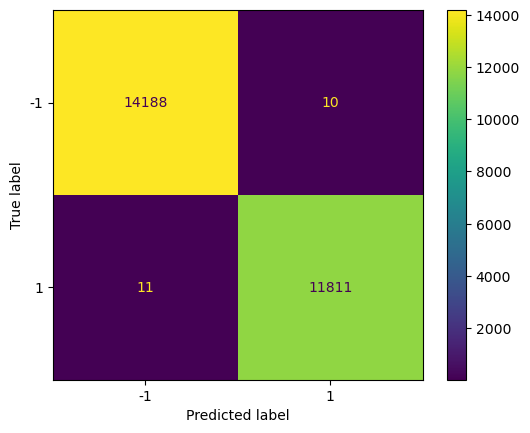

In [17]:
# Displaying the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

## 5. Probabilistic Classifier

In [18]:
# USe the predict_proba method to get the probability of each class
ypred_proba = clf.predict_proba(Xtest)

In [21]:
# Printing a random sample of the probabilities
print(ypred_proba[:5])

[[0.79 0.21]
 [0.02 0.98]
 [0.01 0.99]
 [0.99 0.01]
 [0.92 0.08]]


In [22]:
# Printing the classes
print(clf.classes_)

[-1  1]


In [24]:
# Printing the predixted classes and the relative probabilities
for i in range(5):
    print(f'Predicted class: {ypred[i]}, Predicted probability: {ypred_proba[i]}')

Predicted class: -1, Predicted probability: [0.79 0.21]
Predicted class: 1, Predicted probability: [0.02 0.98]
Predicted class: 1, Predicted probability: [0.01 0.99]
Predicted class: -1, Predicted probability: [0.99 0.01]
Predicted class: -1, Predicted probability: [0.92 0.08]


A possible evaluation function for a board state could be using these probabilities to determine how much is good a certain state.

Suppose we are playing for the black (encoded as -1), and we have all the information about the actual board:
1. we use this model to obatin the proabilities of the prediction 
- imagine to have obtained the following probabilities [x, y]
- x is the probability of 'Black win'
- y is the probability of 'White win'
2. we use the MinMax algorithm to determine the best move
- higher the x, better the move for the Black
- higher the y, better the move for the White


In [25]:
# Extraction of the model to a pickle file
import pickle
filename = '../model/model0.pkl'
pickle.dump(clf, open(filename, 'wb'))


In [27]:
list(X.columns)

['number_of_turn',
 'last_move_played_by',
 'current_player_turn',
 'wQ_moves',
 'wS1_moves',
 'wB1_moves',
 'wG1_moves',
 'wA1_moves',
 'wS2_moves',
 'wB2_moves',
 'wG2_moves',
 'wA2_moves',
 'wG3_moves',
 'wA3_moves',
 'bQ_moves',
 'bS1_moves',
 'bB1_moves',
 'bG1_moves',
 'bA1_moves',
 'bS2_moves',
 'bB2_moves',
 'bG2_moves',
 'bA2_moves',
 'bG3_moves',
 'bA3_moves',
 'wQ_RIGHT_neighbor',
 'wQ_UP_RIGHT_neighbor',
 'wQ_UP_LEFT_neighbor',
 'wQ_LEFT_neighbor',
 'wQ_DOWN_LEFT_neighbor',
 'wQ_DOWN_RIGHT_neighbor',
 'wQ_BELOW_neighbor',
 'wQ_ABOVE_neighbor',
 'wS1_RIGHT_neighbor',
 'wS1_UP_RIGHT_neighbor',
 'wS1_UP_LEFT_neighbor',
 'wS1_LEFT_neighbor',
 'wS1_DOWN_LEFT_neighbor',
 'wS1_DOWN_RIGHT_neighbor',
 'wS1_BELOW_neighbor',
 'wS1_ABOVE_neighbor',
 'wB1_RIGHT_neighbor',
 'wB1_UP_RIGHT_neighbor',
 'wB1_UP_LEFT_neighbor',
 'wB1_LEFT_neighbor',
 'wB1_DOWN_LEFT_neighbor',
 'wB1_DOWN_RIGHT_neighbor',
 'wB1_BELOW_neighbor',
 'wB1_ABOVE_neighbor',
 'wG1_RIGHT_neighbor',
 'wG1_UP_RIGHT_neighb